# Intro:

Here we are analysing loan datset, where the aim of this analysis is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

Lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). 
The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed.  

The main objective is to be able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. 
Identification of such applicants using EDA is what we are doing in this case study.  

## Contents:

1. Data Cleaning
2. Data Analysis
    - Univariate Exploratory Data Analysis (Univariate EDA)
    - Bivariate Exploratory Data Analysis (Bivariate EDA)
    - Multivariate Exploratory Data Analysis (Multivariate EDA)
3. Summary

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# To ignore warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the loan datadset using pandas

df = pd.read_csv("loan.csv")

In [4]:
# Checking the top 5 rows to see how data appears

df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
# Checking the shape of data frame

df.shape      

# This shows that the data frame consits of 39717 Rows and 111 Columns

(39717, 111)

# DATA CLEANING

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [7]:
# Display all rows

# pd.set_option('display.max_rows', None)

In [8]:
# To check number of null values in all columns

df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [9]:
# We can see from above isnull that, there are many columns with all null values in it.
# So we can drop these columns which are having all Null values as these are useless fro analysis.

df.dropna(axis = 1, how = 'all', inplace = True)

In [10]:
df.shape

# We can see that number of columns are reduced from 111 to 57 after dropping all null value columns

(39717, 57)

In [11]:
# CHecking the Null counts in each column
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [12]:
# percentage of missing values in each column after initial clean up of null value columns

round(df.isnull().sum()/len(df.index), 2)*100

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     3.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
mths_since_last_deli

In [13]:
# From the above data, we can drop 33%,65%, 93% and 97% Null value columns

df.drop(['desc','mths_since_last_delinq','mths_since_last_record','next_pymnt_d'],axis = 1, inplace = True)

In [14]:
df.shape

# We are now down to 53 columns from the initial 111 columns

(39717, 53)

In [15]:
# Lets check the remaining Columns and their Datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [16]:
# Show all columns
# pd.set_option('display.max_columns', None)

In [17]:
df.head(15)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,1313.76,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,111.34,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,152.39,Aug-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,121.45,Mar-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


### Analysing some more columns to see if we can drop them

In [18]:
df['collections_12_mths_ex_med'].value_counts()

0.0    39661
Name: collections_12_mths_ex_med, dtype: int64

In [19]:
df['acc_now_delinq'].value_counts()

0    39717
Name: acc_now_delinq, dtype: int64

In [20]:
df['chargeoff_within_12_mths'].value_counts()

0.0    39661
Name: chargeoff_within_12_mths, dtype: int64

In [21]:
df['delinq_amnt'].value_counts()

0    39717
Name: delinq_amnt, dtype: int64

In [22]:
df['pub_rec_bankruptcies'].value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [23]:
df['tax_liens'].value_counts()

0.0    39678
Name: tax_liens, dtype: int64

In [24]:
df['out_prncp'].value_counts()

0.00       38577
1972.60        2
827.13         2
2277.11        2
2963.24        2
           ...  
782.23         1
2296.41        1
1928.85        1
1061.32        1
79.24          1
Name: out_prncp, Length: 1137, dtype: int64

In [25]:
df['out_prncp_inv'].value_counts()

0.00       38577
1972.60        2
1664.64        2
827.13         2
1863.21        1
           ...  
782.23         1
2289.14        1
1928.85        1
1061.32        1
79.24          1
Name: out_prncp_inv, Length: 1138, dtype: int64

In [26]:
df[["url"]]

,url
0,https://lendingclub.com/browse/loanDetail.acti...
1,https://lendingclub.com/browse/loanDetail.acti...
2,https://lendingclub.com/browse/loanDetail.acti...
3,https://lendingclub.com/browse/loanDetail.acti...
4,https://lendingclub.com/browse/loanDetail.acti...
...,...
39712,https://lendingclub.com/browse/loanDetail.acti...
39713,https://lendingclub.com/browse/loanDetail.acti...
39714,https://lendingclub.com/browse/loanDetail.acti...
39715,https://lendingclub.com/browse/loanDetail.acti...


In [27]:
# After analysing the above columns, we can drop few more columns - 
# collections_12_mths_ex_med , acc_now_delinq , chargeoff_within_12_mths , delinq_amnt , tax_liens

df.drop(['collections_12_mths_ex_med','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens'],axis = 1, inplace = True)

In [28]:
# Dropping URL column aswell
df.drop(['url'],axis = 1, inplace = True)

In [29]:
df.shape 

(39717, 47)

## Observation after DATA CLEANING: 

#### After initial DATA CLEANING, we are now left with only 47 Columns from the initial 111 columns

# DATA ANALYSIS

--- The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

--- So Fields which are created after giving loan does not serve our purpose.

--- So we can remove them aswell

In [30]:
df[["out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv",
    "total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries",
    "collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","last_credit_pull_d"]]

,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
0,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16
1,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13
2,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16
3,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16
4,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16
...,...,...,...,...,...,...,...,...,...,...,...,...
39712,0.00,0.00,2822.969293,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,Jun-10
39713,0.00,0.00,9913.491822,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,Jul-10
39714,0.00,0.00,5272.161128,1397.12,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,Jun-07
39715,0.00,0.00,5174.198551,672.66,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,Jun-07


In [31]:
df.drop(["out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv",
    "total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries",
    "collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","last_credit_pull_d"],axis = 1, inplace = True)

In [32]:
df.shape

(39717, 35)

### Based on our requirements we have identified and removed 12 more columns.
### So we reduced the total columns to 35 for further analysis.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39717 non-null  int64  
 1   member_id             39717 non-null  int64  
 2   loan_amnt             39717 non-null  int64  
 3   funded_amnt           39717 non-null  int64  
 4   funded_amnt_inv       39717 non-null  float64
 5   term                  39717 non-null  object 
 6   int_rate              39717 non-null  object 
 7   installment           39717 non-null  float64
 8   grade                 39717 non-null  object 
 9   sub_grade             39717 non-null  object 
 10  emp_title             37258 non-null  object 
 11  emp_length            38642 non-null  object 
 12  home_ownership        39717 non-null  object 
 13  annual_inc            39717 non-null  float64
 14  verification_status   39717 non-null  object 
 15  issue_d            

In [34]:
df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,policy_code,application_type,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,1,3,0,13648,83.70%,9,f,1,INDIVIDUAL,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,5,3,0,1687,9.40%,4,f,1,INDIVIDUAL,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2,2,0,2956,98.50%,10,f,1,INDIVIDUAL,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,1,10,0,5598,21%,37,f,1,INDIVIDUAL,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,0,15,0,27783,53.90%,38,f,1,INDIVIDUAL,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,3,9,0,7963,28.30%,12,f,1,INDIVIDUAL,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,1,7,0,17726,85.60%,11,f,1,INDIVIDUAL,0.0
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,2,4,0,8221,87.50%,4,f,1,INDIVIDUAL,0.0
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,2,11,0,5210,32.60%,13,f,1,INDIVIDUAL,0.0
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,0,2,0,9279,36.50%,3,f,1,INDIVIDUAL,0.0


In [35]:
df['pymnt_plan'].value_counts()

n    39717
Name: pymnt_plan, dtype: int64

In [36]:
df.shape

(39717, 35)

In [37]:
### from above, looks like 'pymnt_plan' column also does not give any valuable info,
### as the distinct values in it is same as number of rows in the df.
### So we can remove it

df.drop(['pymnt_plan'], axis=1, inplace=True)

In [38]:
df.shape

(39717, 34)

In [39]:
df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,policy_code,application_type,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,1,3,0,13648,83.70%,9,f,1,INDIVIDUAL,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,5,3,0,1687,9.40%,4,f,1,INDIVIDUAL,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2,2,0,2956,98.50%,10,f,1,INDIVIDUAL,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,1,10,0,5598,21%,37,f,1,INDIVIDUAL,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,0,15,0,27783,53.90%,38,f,1,INDIVIDUAL,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,3,9,0,7963,28.30%,12,f,1,INDIVIDUAL,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,1,7,0,17726,85.60%,11,f,1,INDIVIDUAL,0.0
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,2,4,0,8221,87.50%,4,f,1,INDIVIDUAL,0.0
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,2,11,0,5210,32.60%,13,f,1,INDIVIDUAL,0.0
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,0,2,0,9279,36.50%,3,f,1,INDIVIDUAL,0.0


In [40]:
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [41]:
### For who can default, there is nothing that can be determined using "current" loan status.
### So this can also be dropped

df[df['loan_status']=='Current']

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,policy_code,application_type,pub_rec_bankruptcies
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,...,0,15,0,27783,53.90%,38,f,1,INDIVIDUAL,0.0
32,1065420,1299514,10000,10000,9975.00000,60 months,15.96%,242.97,C,C5,...,1,11,0,16158,63.60%,31,f,1,INDIVIDUAL,0.0
39,1069346,1304237,12500,12500,12475.00000,60 months,12.69%,282.44,B,B5,...,3,6,0,10143,50%,24,f,1,INDIVIDUAL,0.0
86,1063958,1297940,14000,14000,13975.00000,60 months,17.27%,349.98,D,D3,...,2,5,0,6986,79.40%,10,f,1,INDIVIDUAL,0.0
95,1068575,1303001,15300,15300,15275.00000,60 months,22.06%,423.10,F,F4,...,2,14,0,26524,89.70%,27,f,1,INDIVIDUAL,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15972,725556,920821,10400,10400,10400.00000,60 months,6.00%,218.99,E,E3,...,0,7,0,8696,95.60%,15,f,1,INDIVIDUAL,0.0
15981,738420,935790,6000,6000,6000.00000,60 months,10.37%,128.58,B,B3,...,0,6,0,12,0.20%,9,f,1,INDIVIDUAL,0.0
16361,733695,930086,19200,19200,18847.76292,60 months,10.74%,414.97,B,B4,...,0,6,0,0,0%,10,f,1,INDIVIDUAL,0.0
16609,728422,924106,9350,9350,9350.00000,60 months,10.00%,198.66,B,B2,...,0,4,0,88,5.90%,7,f,1,INDIVIDUAL,0.0


In [42]:
### Deleting the  Current loan staus rows in the df

df = df[df['loan_status']!='Current']
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,policy_code,application_type,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,1,3,0,13648,83.70%,9,f,1,INDIVIDUAL,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,5,3,0,1687,9.40%,4,f,1,INDIVIDUAL,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2,2,0,2956,98.50%,10,f,1,INDIVIDUAL,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,1,10,0,5598,21%,37,f,1,INDIVIDUAL,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,3,9,0,7963,28.30%,12,f,1,INDIVIDUAL,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,0,13,0,7274,13.10%,40,f,1,INDIVIDUAL,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,1,6,0,8847,26.90%,9,f,1,INDIVIDUAL,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0,11,0,9698,19.40%,20,f,1,INDIVIDUAL,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0,17,0,85607,0.70%,26,f,1,INDIVIDUAL,NaN


In [43]:
df[['emp_length']]

,emp_length
0,10+ years
1,< 1 year
2,10+ years
3,10+ years
5,3 years
...,...
39712,4 years
39713,3 years
39714,< 1 year
39715,< 1 year


In [44]:
df[df['emp_length'].isnull()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,policy_code,application_type,pub_rec_bankruptcies
168,1067644,1302032,2500,2500,2500.00000,36 months,7.51%,77.78,A,A3,...,2,13,0,4853,42.20%,20,f,1,INDIVIDUAL,0.0
323,1058717,1290516,18000,18000,18000.00000,60 months,17.58%,452.98,D,D4,...,1,11,0,5945,83.70%,28,f,1,INDIVIDUAL,0.0
394,1064582,1298394,4000,4000,4000.00000,36 months,11.71%,132.31,B,B3,...,0,4,0,1593,54.90%,6,f,1,INDIVIDUAL,0.0
422,1064366,1298164,1000,1000,1000.00000,36 months,14.65%,34.50,C,C3,...,2,3,1,2510,83.70%,8,f,1,INDIVIDUAL,1.0
439,1063912,1296491,8250,8250,8250.00000,36 months,7.51%,256.67,A,A3,...,4,17,0,7521,10.40%,37,f,1,INDIVIDUAL,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32591,480410,610728,10000,10000,9975.00000,36 months,14.22%,342.85,C,C5,...,0,9,0,9696,66.40%,17,f,1,INDIVIDUAL,0.0
32608,480216,610335,3700,3700,3700.00000,36 months,14.22%,126.86,C,C5,...,0,2,0,1605,45.90%,5,f,1,INDIVIDUAL,0.0
32621,479954,609955,10000,10000,9731.17513,36 months,14.22%,342.85,C,C5,...,3,3,0,344,34.40%,19,f,1,INDIVIDUAL,0.0
32631,479836,609803,6000,6000,6000.00000,36 months,12.73%,201.40,C,C1,...,0,7,1,7088,63.30%,12,f,1,INDIVIDUAL,0.0


In [45]:
# To modify the EMP_LENGTH we will remove the NULL columns and then Modify the column

df = df[~df['emp_length'].isnull()]    # ~ Negating it, so that nulls are excluded

df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,policy_code,application_type,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,1,3,0,13648,83.70%,9,f,1,INDIVIDUAL,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,5,3,0,1687,9.40%,4,f,1,INDIVIDUAL,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2,2,0,2956,98.50%,10,f,1,INDIVIDUAL,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,1,10,0,5598,21%,37,f,1,INDIVIDUAL,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,3,9,0,7963,28.30%,12,f,1,INDIVIDUAL,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,0,13,0,7274,13.10%,40,f,1,INDIVIDUAL,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,1,6,0,8847,26.90%,9,f,1,INDIVIDUAL,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0,11,0,9698,19.40%,20,f,1,INDIVIDUAL,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0,17,0,85607,0.70%,26,f,1,INDIVIDUAL,NaN


In [46]:
# using regular expression to extract numeric values from the string
import re
df['emp_length'] = df['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])
df['emp_length'] 

# Here the dtype: object for emp_length

0        10
1         1
2        10
3        10
5         3
         ..
39712     4
39713     3
39714     1
39715     1
39716     1
Name: emp_length, Length: 37544, dtype: object

In [47]:
# convert to numeric
df['emp_length'] = df['emp_length'].apply(lambda x: pd.to_numeric(x))
df['emp_length']

# We can see that the dtype: int64 now

0        10
1         1
2        10
3        10
5         3
         ..
39712     4
39713     3
39714     1
39715     1
39716     1
Name: emp_length, Length: 37544, dtype: int64

In [48]:
# lets check the Interest rate column

df['int_rate'].head()      ## it's dtype is object. So lets change this aswell

0    10.65%
1    15.27%
2    15.96%
3    13.49%
5     7.90%
Name: int_rate, dtype: object

In [49]:
# We will first remove the Percent symbol and change the object type to float since decimal values are present

df['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 37544, dtype: float64

In [50]:
# Storing it in the int_rate column after modifying - i.e., removing % and changing dtype
df['int_rate'] = df['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [51]:
df['int_rate'].describe()

count    37544.000000
mean        11.963319
std          3.683012
min          5.420000
25%          8.940000
50%         11.830000
75%         14.420000
max         24.400000
Name: int_rate, dtype: float64

### Let us check the relation between Loan amount and annual income

In [52]:
df['lnamt_to_anlinc'] = round(df['loan_amnt']/df['annual_inc'],2)

In [53]:
df['lnamt_to_anlinc'].head()

0    0.21
1    0.08
2    0.20
3    0.20
5    0.14
Name: lnamt_to_anlinc, dtype: float64

# UNIVARIATE Analysis

## 1. loan_status

In [54]:
df['loan_status'].head()

0     Fully Paid
1    Charged Off
2     Fully Paid
3     Fully Paid
5     Fully Paid
Name: loan_status, dtype: object

In [55]:
df['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Name: loan_status, dtype: int64

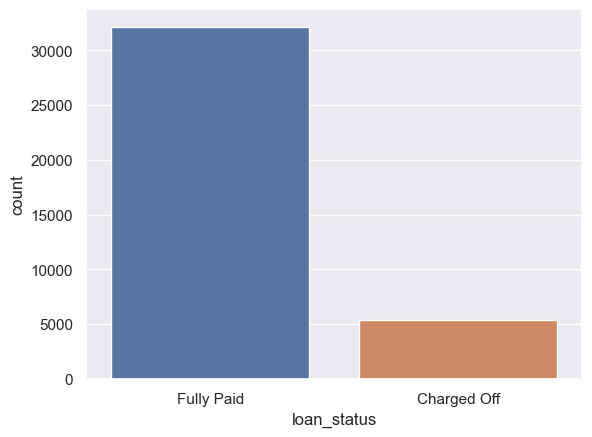

In [56]:
# Count Plot for Loan Status

sns.set(style="darkgrid")
sns.countplot(x=df['loan_status'], data=df)
plt.show()

In [57]:
counts = df['loan_status'].value_counts()
percs = df['loan_status'].value_counts(normalize=True)
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

,count,percentage
Fully Paid,32145,0.856195
Charged Off,5399,0.143805


In [58]:
res_loan_status = pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])
res_loan_status

,count,percentage
Fully Paid,32145,0.856195
Charged Off,5399,0.143805


<Axes: >

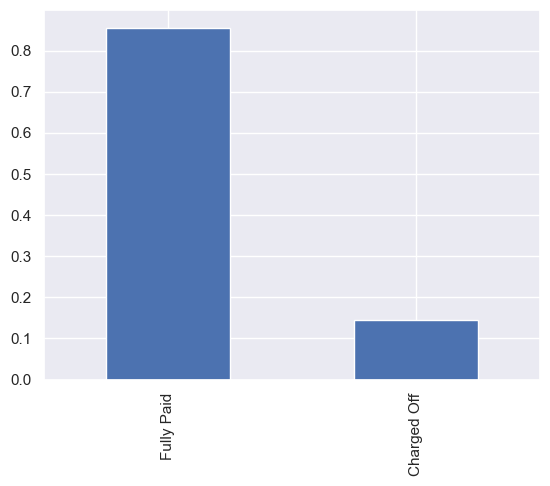

In [59]:
# Representing Loan Status in terms of percentages

res_loan_status['percentage'].plot.bar()

## Observation - 1:

### From this plot, we can infer that around 85% of loans were fully paid back and only 14% were charged off i.e., defaulted by customers.

## 2. Loan Issue year

In [60]:
df['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [61]:
import datetime
df['issue_year'] = df['issue_d'].apply(lambda x : datetime.datetime.strptime(x, '%b-%y').year)

In [62]:
df['issue_year'].head()

0    2011
1    2011
2    2011
3    2011
5    2011
Name: issue_year, dtype: int64

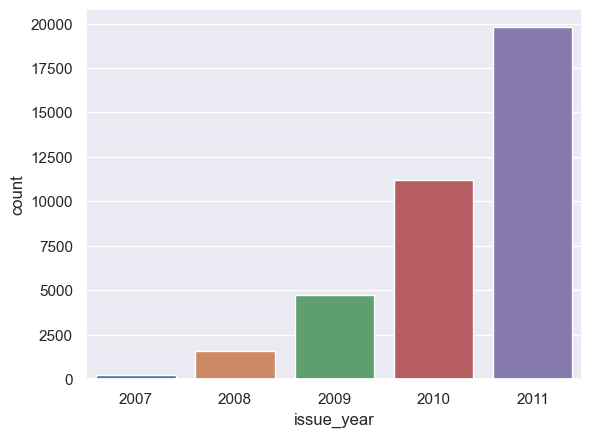

In [63]:
# Count Plot for Loan Issue Year

sns.set(style="darkgrid")
sns.countplot(x=df['issue_year'], data=df)
sns.color_palette("tab10")
plt.show()

## Observation - 2:

### From this plot, we can infer that most of the loans were passed in the year 2011 and very less number of loans were passed in 2007.

### Also we see that yesr-on-year the number of loans issued have increased almost exponentially.

## 3. grade

In [64]:
df['grade'].value_counts()

B    11359
A     9660
C     7669
D     4979
E     2620
F      959
G      298
Name: grade, dtype: int64

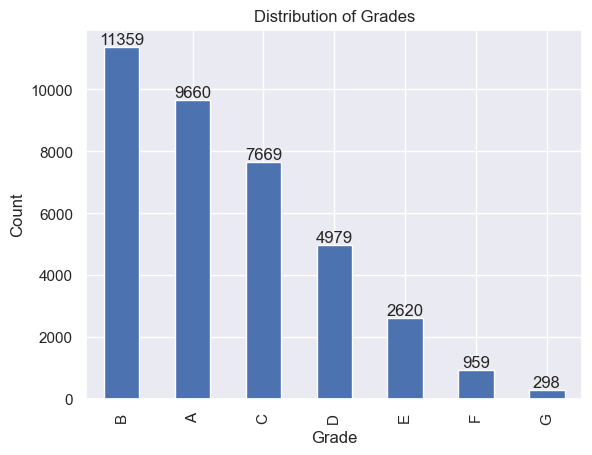

In [65]:
# Create the bar plot
ax = df['grade'].value_counts().plot.bar()

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    
## The for loop iterates over each bar (p) in the plot and uses the annotate function to add the value on top of each bar. 
## The (p.get_x() + p.get_width() / 2., p.get_height()) specifies the coordinates where the text annotation will be placed. 
## The xytext=(0, 5) argument specifies an offset of 5 points above the bar for the text

plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Distribution of Grades')
plt.show()

## Observation - 3:

### From this plot, we can observe that employees with B grade followed A took more loans then employees with G grade.

## 4. Loan Purpose

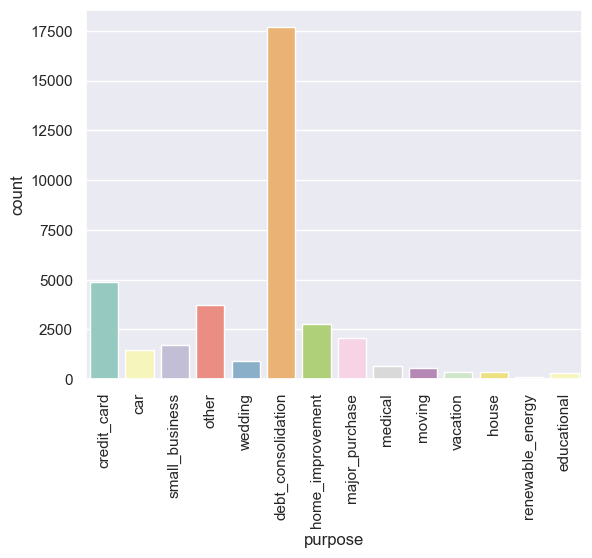

In [66]:
# Count Plot for purpose

sns.set(style="darkgrid")
sns.countplot(x=df['purpose'], data=df,palette="Set3")
plt.xticks(rotation=90)
plt.show()

In [67]:
df['purpose'].value_counts()

debt_consolidation    17675
credit_card            4899
other                  3713
home_improvement       2785
major_purchase         2080
small_business         1710
car                    1448
wedding                 913
medical                 656
moving                  552
house                   354
vacation                348
educational             317
renewable_energy         94
Name: purpose, dtype: int64

## Observation - 4:

### From this plot, we can observe that most of the loans were taken by customers for debt consolidation.
### and least amounts of loans were taken for purpose of renewable energy

## 5. Employee Experience

In [68]:
df["emp_length"].value_counts()

10    8488
1     7677
2     4291
3     4012
4     3342
5     3194
6     2168
7     1711
8     1435
9     1226
Name: emp_length, dtype: int64

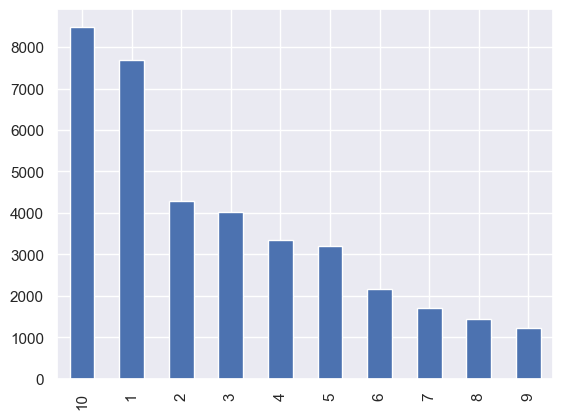

In [69]:
df["emp_length"].value_counts().plot.bar()
plt.show()

## Observation - 5:

### From this plot, we can observe that the employees with most experience i.e., 10 years and employees with least experience i.e 1 year have taken most of the loans.

## 6. Loan Amount

In [70]:
df['loan_amnt']

0         5000
1         2500
2         2400
3        10000
5         5000
         ...  
39712     2500
39713     8500
39714     5000
39715     5000
39716     7500
Name: loan_amnt, Length: 37544, dtype: int64

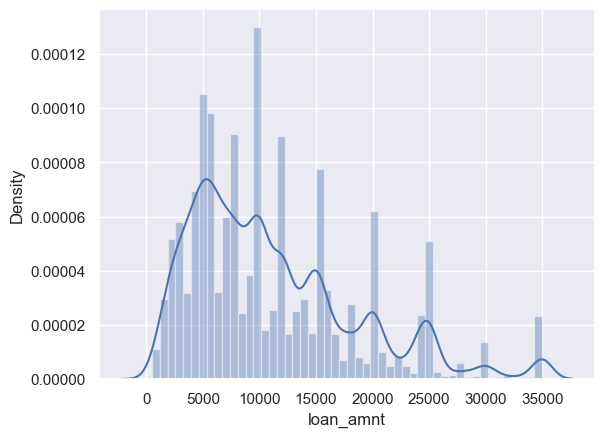

In [71]:
sns.distplot(df['loan_amnt'])
plt.show()

## Observation - 6:

### A peak in interest rate is observed around loan amount of 5000 range

## 7. Interest Rate

In [72]:
df['int_rate']

0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 37544, dtype: float64

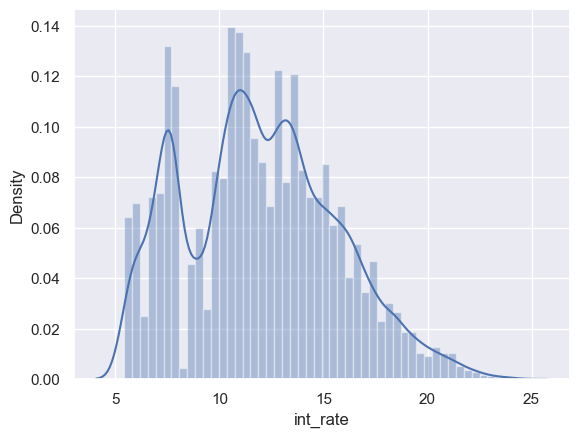

In [73]:
sns.distplot(df['int_rate'])
plt.show()

## Observation - 7:

### We can see a double peak in interest rate around 7.5 and 12

## 8. Classification of loan term by purpose

In [74]:
df['term']

0         36 months
1         60 months
2         36 months
3         36 months
5         36 months
            ...    
39712     36 months
39713     36 months
39714     36 months
39715     36 months
39716     36 months
Name: term, Length: 37544, dtype: object

In [75]:
df['term_mod'] = df['term'].str.extract('(\d+)').astype(int)

In [76]:
df['term_mod']

0        36
1        60
2        36
3        36
5        36
         ..
39712    36
39713    36
39714    36
39715    36
39716    36
Name: term_mod, Length: 37544, dtype: int32

In [77]:
df.groupby(['purpose'])['term_mod'].value_counts()

purpose             term_mod
car                 36            954
                    60            494
credit_card         36           3983
                    60            916
debt_consolidation  36          12845
                    60           4830
educational         36            303
                    60             14
home_improvement    36           2012
                    60            773
house               36            248
                    60            106
major_purchase      36           1667
                    60            413
medical             36            508
                    60            148
moving              36            460
                    60             92
other               36           3017
                    60            696
renewable_energy    36             69
                    60             25
small_business      36           1207
                    60            503
vacation            36            297
                    6

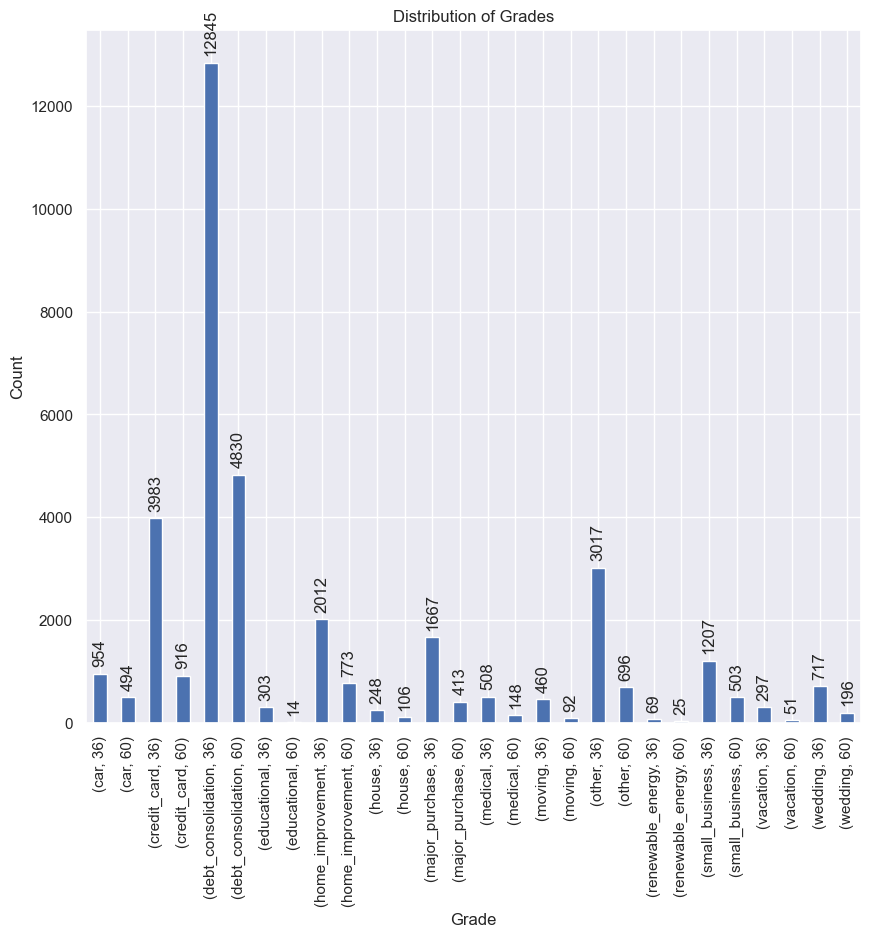

In [78]:
plt.figure(figsize=(10, 9))

ax=df.groupby(['purpose'])['term_mod'].value_counts().plot.bar()


# Add values on top of the bars and rortate the value by 90 degrees
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points',rotation=90)
    
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Distribution of Grades')
plt.show()

## Observation - 8:

### Most of the loans were taken for short term debt consolidation.
### very less number of loans were taken for long term educational followed by long term renewable energy, long term vaccation and long term moving.

## 9. Classification of loan term by loan status

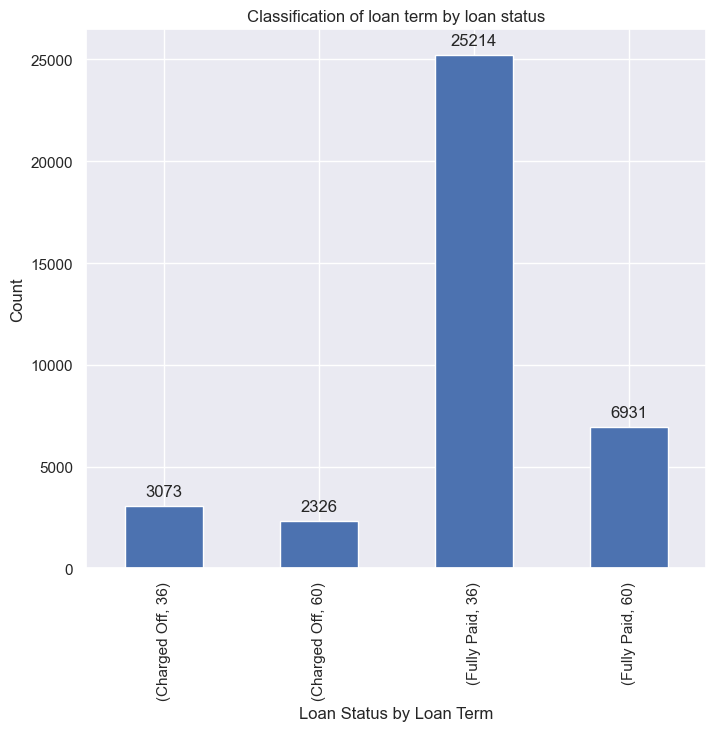

In [79]:
plt.figure(figsize=(8, 7))
ax=df.groupby(['loan_status'])['term_mod'].value_counts().plot.bar()

# Add values on top of the bars and rortate the value by 90 degrees
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')
    
plt.xlabel('Loan Status by Loan Term')
plt.ylabel('Count')
plt.title('Classification of loan term by loan status')
plt.show()

## Observation - 9:

### We can observe that short term loans are mostly fully paid

## 10. Analysing the purpose based on loan status

In [80]:
df.groupby(['purpose'])['loan_status'].value_counts()

purpose             loan_status
car                 Fully Paid      1293
                    Charged Off      155
credit_card         Fully Paid      4389
                    Charged Off      510
debt_consolidation  Fully Paid     14996
                    Charged Off     2679
educational         Fully Paid       265
                    Charged Off       52
home_improvement    Fully Paid      2455
                    Charged Off      330
house               Fully Paid       295
                    Charged Off       59
major_purchase      Fully Paid      1869
                    Charged Off      211
medical             Fully Paid       555
                    Charged Off      101
moving              Fully Paid       468
                    Charged Off       84
other               Fully Paid      3117
                    Charged Off      596
renewable_energy    Fully Paid        76
                    Charged Off       18
small_business      Fully Paid      1248
                    Charg

In [81]:
loan_status_by_purpose = df.groupby(['purpose'])['loan_status'].value_counts()

loan_status_by_purpose_percentage = loan_status_by_purpose.groupby(level=0).apply(lambda x : 100 * x / float(x.sum()))
print(loan_status_by_purpose_percentage)

purpose             loan_status
car                 Fully Paid     89.295580
                    Charged Off    10.704420
credit_card         Fully Paid     89.589712
                    Charged Off    10.410288
debt_consolidation  Fully Paid     84.842999
                    Charged Off    15.157001
educational         Fully Paid     83.596215
                    Charged Off    16.403785
home_improvement    Fully Paid     88.150808
                    Charged Off    11.849192
house               Fully Paid     83.333333
                    Charged Off    16.666667
major_purchase      Fully Paid     89.855769
                    Charged Off    10.144231
medical             Fully Paid     84.603659
                    Charged Off    15.396341
moving              Fully Paid     84.782609
                    Charged Off    15.217391
other               Fully Paid     83.948290
                    Charged Off    16.051710
renewable_energy    Fully Paid     80.851064
                    Cha

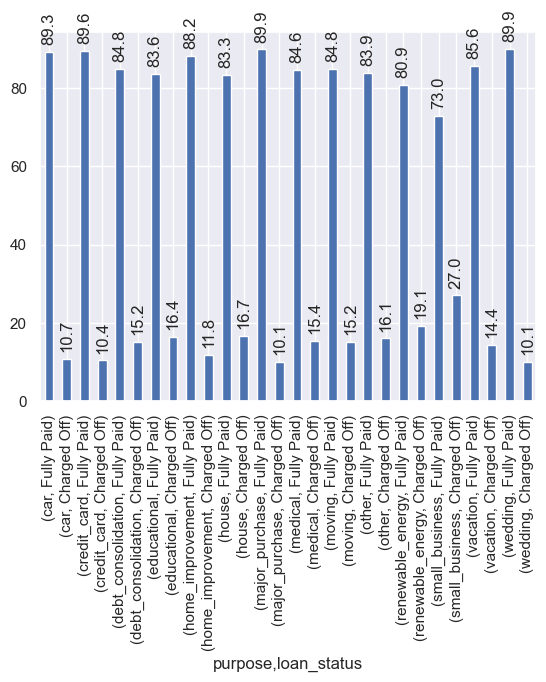

In [82]:
# bar plot to show the percentage of loan status based on purpose
ax=loan_status_by_purpose_percentage.plot.bar()

for p in ax.patches:
    ax.annotate("{:.1f}".format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points',rotation=90)
plt.show()

## Observation - 10:

### 27% of small business loans and 19% of renewable energy loans are charged off.
### Only 10% of loans are charged for car, credit card, major purchase, home inprovement and wedding.
### Loans taken for the remaining purposes are charged off around 15% on average.

## 11. Analysing loan status based on purpose

In [83]:
df.groupby(['loan_status'])['purpose'].value_counts()

loan_status  purpose           
Charged Off  debt_consolidation     2679
             other                   596
             credit_card             510
             small_business          462
             home_improvement        330
             major_purchase          211
             car                     155
             medical                 101
             wedding                  92
             moving                   84
             house                    59
             educational              52
             vacation                 50
             renewable_energy         18
Fully Paid   debt_consolidation    14996
             credit_card            4389
             other                  3117
             home_improvement       2455
             major_purchase         1869
             car                    1293
             small_business         1248
             wedding                 821
             medical                 555
             moving      

In [84]:
purpose_by_loan_status = df.groupby(['loan_status'])['purpose'].value_counts()

purpose_by_loan_status_percentage = purpose_by_loan_status.groupby(level=0).apply(lambda x : 100 * x / float(x.sum()))
print(purpose_by_loan_status_percentage)

loan_status  purpose           
Charged Off  debt_consolidation    49.620300
             other                 11.039081
             credit_card            9.446194
             small_business         8.557140
             home_improvement       6.112243
             major_purchase         3.908131
             car                    2.870902
             medical                1.870717
             wedding                1.704019
             moving                 1.555844
             house                  1.092795
             educational            0.963141
             vacation               0.926097
             renewable_energy       0.333395
Fully Paid   debt_consolidation    46.651112
             credit_card           13.653756
             other                  9.696687
             home_improvement       7.637269
             major_purchase         5.814279
             car                    4.022399
             small_business         3.882408
             wedding   

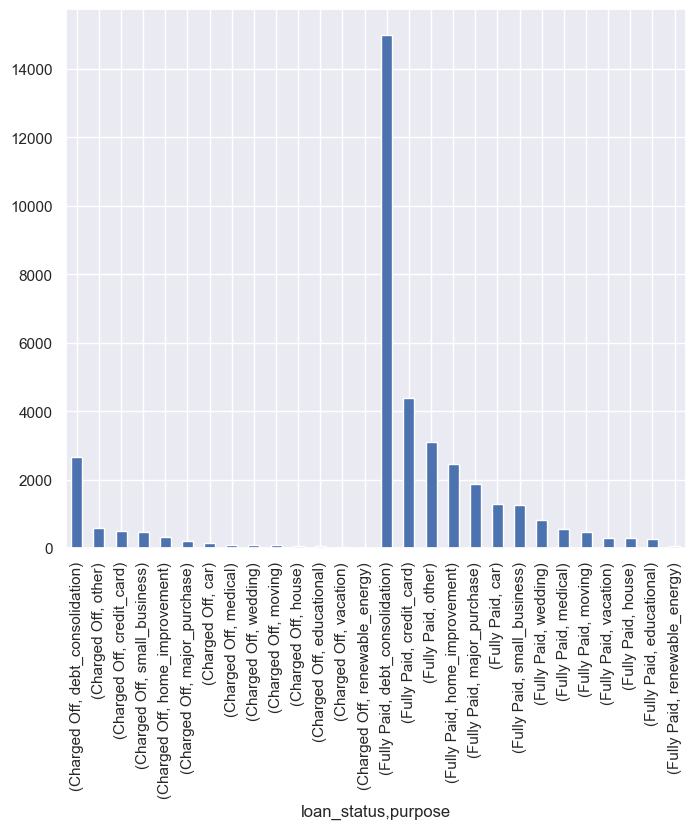

In [85]:
plt.figure(figsize=(8, 7))
df.groupby(['loan_status'])['purpose'].value_counts().plot.bar()
plt.show()

## Observation - 11:

### Almost 50% of the charged off loans are taken for the purpose of debt consolidation.
### Interestingly 47% of the fully paid loans are also taken for the purpose of debt consolidation.

# Summary of Observations from UNIVARIATE analysis:

# Bivariate Analysis

In [86]:
# Checking the Policy_code column

df["policy_code"].value_counts()

1    37544
Name: policy_code, dtype: int64

In [87]:
df.shape

(37544, 37)

In [88]:
# Dropping Policy Code as it appears of no use

df.drop(['policy_code'], axis=1, inplace=True)

In [89]:
# Checking co-relation

df.corr()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,pub_rec_bankruptcies,lnamt_to_anlinc,issue_year,term_mod
id,1.000000,0.993497,0.125203,0.135822,0.237490,0.058250,0.079642,0.107820,0.008949,0.091783,-0.008238,-0.040835,0.018054,-0.019355,0.001765,0.041076,-0.010225,0.079953,0.848261,0.181958
member_id,0.993497,1.000000,0.125280,0.135138,0.247598,0.055243,0.074751,0.112406,0.010072,0.093152,-0.007689,-0.045809,0.015699,-0.019064,-0.001414,0.043507,-0.009929,0.078824,0.884347,0.200597
loan_amnt,0.125203,0.125280,1.000000,0.981603,0.936871,0.299237,0.931686,0.148267,0.266282,0.061402,-0.033757,0.013068,0.174008,-0.046378,0.313399,0.255538,-0.031758,0.607075,0.115074,0.345564
funded_amnt,0.135822,0.135138,0.981603,1.000000,0.955300,0.302955,0.957721,0.147930,0.261959,0.061251,-0.033857,0.013111,0.172546,-0.046898,0.306119,0.249803,-0.032708,0.595074,0.126093,0.323564
funded_amnt_inv,0.237490,0.247598,0.936871,0.955300,1.000000,0.295697,0.904110,0.158852,0.249320,0.070007,-0.040029,-0.002744,0.159554,-0.048416,0.285718,0.241953,-0.037598,0.563488,0.259073,0.343151
int_rate,0.058250,0.055243,0.299237,0.302955,0.295697,1.000000,0.274791,-0.000602,0.046092,0.112188,0.158199,0.132576,0.007594,0.098996,0.095136,-0.045310,0.082988,0.210852,0.044083,0.440717
installment,0.079642,0.074751,0.931686,0.957721,0.904110,0.274791,1.000000,0.121101,0.264684,0.050727,-0.021675,0.011296,0.169816,-0.042153,0.309157,0.229250,-0.029352,0.547848,0.057550,0.087956
emp_length,0.107820,0.112406,0.148267,0.147930,0.158852,-0.000602,0.121101,1.000000,0.111107,0.048619,0.015420,0.010509,0.096527,0.064306,0.152202,0.208555,0.063212,-0.003590,0.115340,0.104220
annual_inc,0.008949,0.010072,0.266282,0.261959,0.249320,0.046092,0.264684,0.111107,1.000000,-0.123582,0.021229,0.035976,0.154494,-0.014369,0.276693,0.233436,-0.012378,-0.232839,0.012689,0.043201
dti,0.091783,0.093152,0.061402,0.061251,0.070007,0.112188,0.050727,0.048619,-0.123582,1.000000,-0.034370,0.000480,0.288942,-0.004740,0.227602,0.229949,0.006733,0.147621,0.094332,0.078386


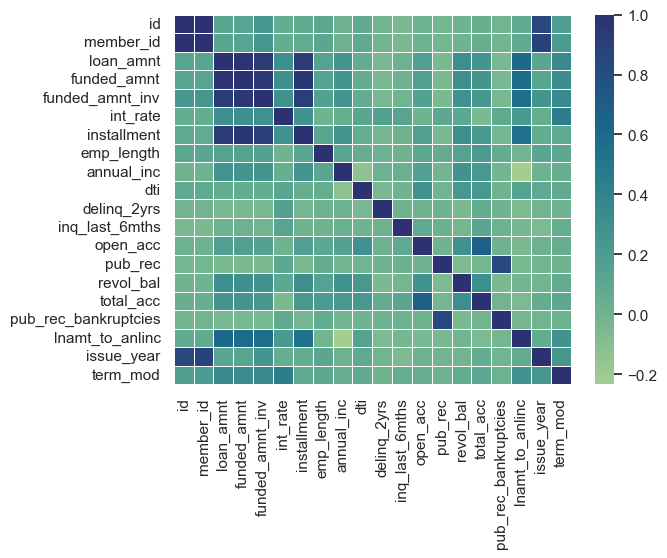

In [90]:
# Plotting the co-relation using HeatMap

sns.heatmap(df.corr(),cmap="crest",  linewidth=.5,fmt='.3g')
plt.show()

## 1. Analyze the relationship between - loan status and int_rate

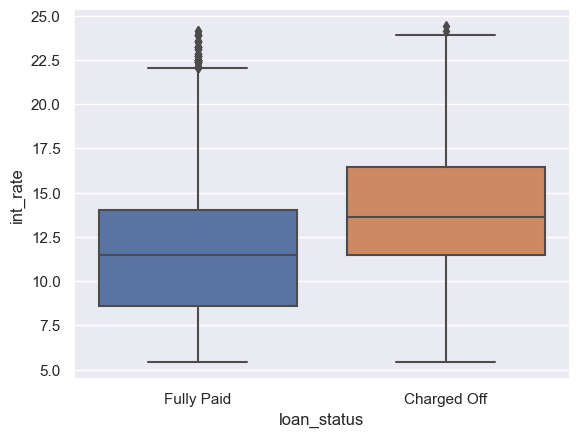

In [91]:
sns.boxplot(x = 'loan_status', y = 'int_rate' ,data=df)
plt.show()

## Observation - 1:

### We can see that the mean of interest rate for Fully paid is less than the mean of onterest rate for charged off.

## 2. Analyze the relationship between - loan status and salary

In [92]:
df['annual_inc'].quantile([0.25, 0.5,0.75,0.85,0.9,1.0])

0.25      41000.0
0.50      60000.0
0.75      83000.0
0.85     100000.0
0.90     116672.4
1.00    6000000.0
Name: annual_inc, dtype: float64

### Observation - 2 (A):

### We can see a huge difference in values between 90% and 100%.
### So while plotting we will limit the salary to 90% value i.e., 116672

In [93]:
df[df['annual_inc'] < 116672]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,pub_rec_bankruptcies,lnamt_to_anlinc,issue_year,term_mod
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,0,13648,83.70%,9,f,INDIVIDUAL,0.0,0.21,2011,36
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,0,1687,9.40%,4,f,INDIVIDUAL,0.0,0.08,2011,60
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,0,2956,98.50%,10,f,INDIVIDUAL,0.0,0.20,2011,36
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,0,5598,21%,37,f,INDIVIDUAL,0.0,0.20,2011,36
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,0,7963,28.30%,12,f,INDIVIDUAL,0.0,0.14,2011,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39711,92402,92390,5000,5000,700.0,36 months,8.70,158.30,B,B1,...,0,66033,23%,29,f,INDIVIDUAL,NaN,0.07,2007,36
39712,92187,92174,2500,2500,1075.0,36 months,8.07,78.42,A,A4,...,0,7274,13.10%,40,f,INDIVIDUAL,NaN,0.02,2007,36
39713,90665,90607,8500,8500,875.0,36 months,10.28,275.38,C,C1,...,0,8847,26.90%,9,f,INDIVIDUAL,NaN,0.47,2007,36
39714,90395,90390,5000,5000,1325.0,36 months,8.07,156.84,A,A4,...,0,9698,19.40%,20,f,INDIVIDUAL,NaN,0.05,2007,36


In [94]:
sal_limit = df[df['annual_inc'] < 116672]

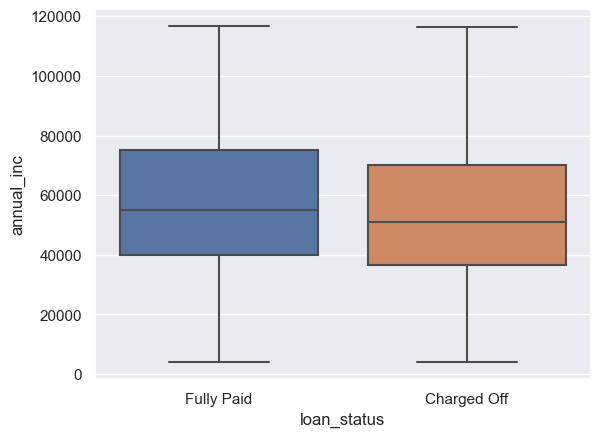

In [95]:
sns.boxplot(x = 'loan_status', y = 'annual_inc' ,data=sal_limit)
plt.show()

## Observation - 2(B):

### We can observe that the mean annual income of Fully paid people is more than the mean annual income of charged off people.
### So people with less income are likely to default the loan.

## 3. Analyze the relationship between - loan Status and grade

In [96]:
df.groupby(['grade'])['loan_status'].value_counts()

grade  loan_status
A      Fully Paid      9102
       Charged Off      558
B      Fully Paid     10004
       Charged Off     1355
C      Fully Paid      6381
       Charged Off     1288
D      Fully Paid      3894
       Charged Off     1085
E      Fully Paid      1920
       Charged Off      700
F      Fully Paid       646
       Charged Off      313
G      Fully Paid       198
       Charged Off      100
Name: loan_status, dtype: int64

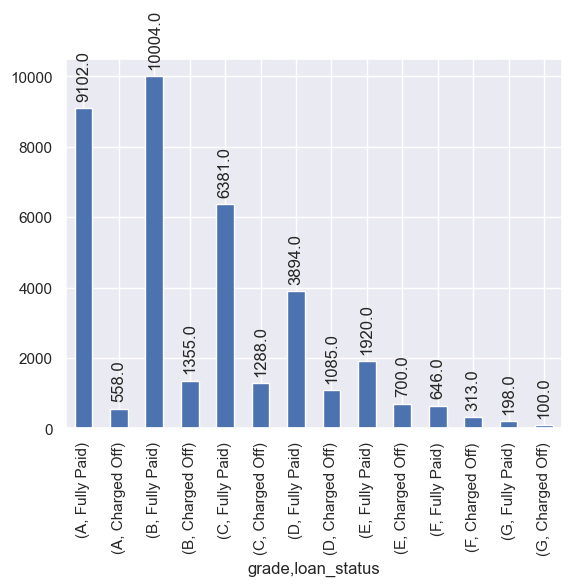

In [97]:
ax = df.groupby(['grade'])['loan_status'].value_counts().plot.bar()

for p in ax.patches:
    ax.annotate("{:.1f}".format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points',rotation=90)
plt.show()

In [98]:
# Percentage by lambda and DataFrame.apply() method.

loan_status_by_grade = df.groupby(['grade'])['loan_status'].value_counts()

loan_status_by_grade_percentage = loan_status_by_grade.groupby(level=0).apply(lambda x : 100 * x / float(x.sum()))
print(loan_status_by_grade_percentage)

grade  loan_status
A      Fully Paid     94.223602
       Charged Off     5.776398
B      Fully Paid     88.071133
       Charged Off    11.928867
C      Fully Paid     83.205111
       Charged Off    16.794889
D      Fully Paid     78.208476
       Charged Off    21.791524
E      Fully Paid     73.282443
       Charged Off    26.717557
F      Fully Paid     67.361835
       Charged Off    32.638165
G      Fully Paid     66.442953
       Charged Off    33.557047
Name: loan_status, dtype: float64


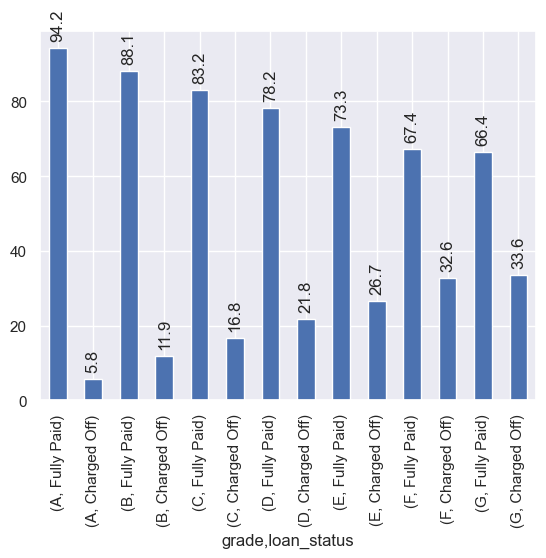

In [99]:
# Bar plot showing in Percentage the loan status by employee grade
ax=loan_status_by_grade_percentage.plot.bar()

for p in ax.patches:
    ax.annotate("{:.1f}".format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points',rotation=90)
plt.show()

## Observation - 3:

### Employees of grade G are less likely to fully pay the loan then that of A grade.
### As we go from grade G to A, their chances of not paying the loan back increases.

## 4. Analyze the relationship between - loan Status and Loan Amount

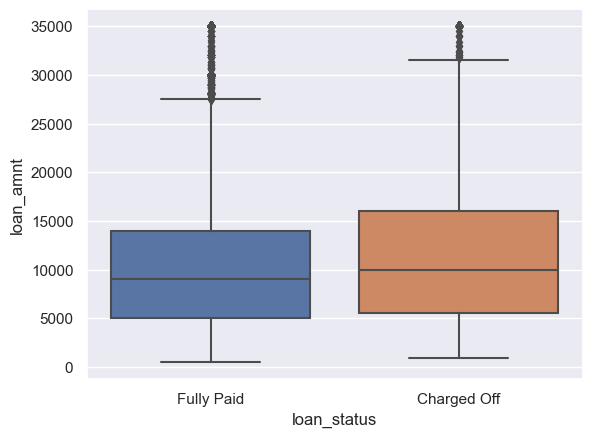

In [100]:
# 'loan_amnt'
sns.boxplot(x = 'loan_status', y = 'loan_amnt' ,data=sal_limit)
plt.show()

## Observation - 4:

### Lower loan amounts are more likely to be fully paid

## 5. Analyze the relationship between - Annual Income and Loan purpose

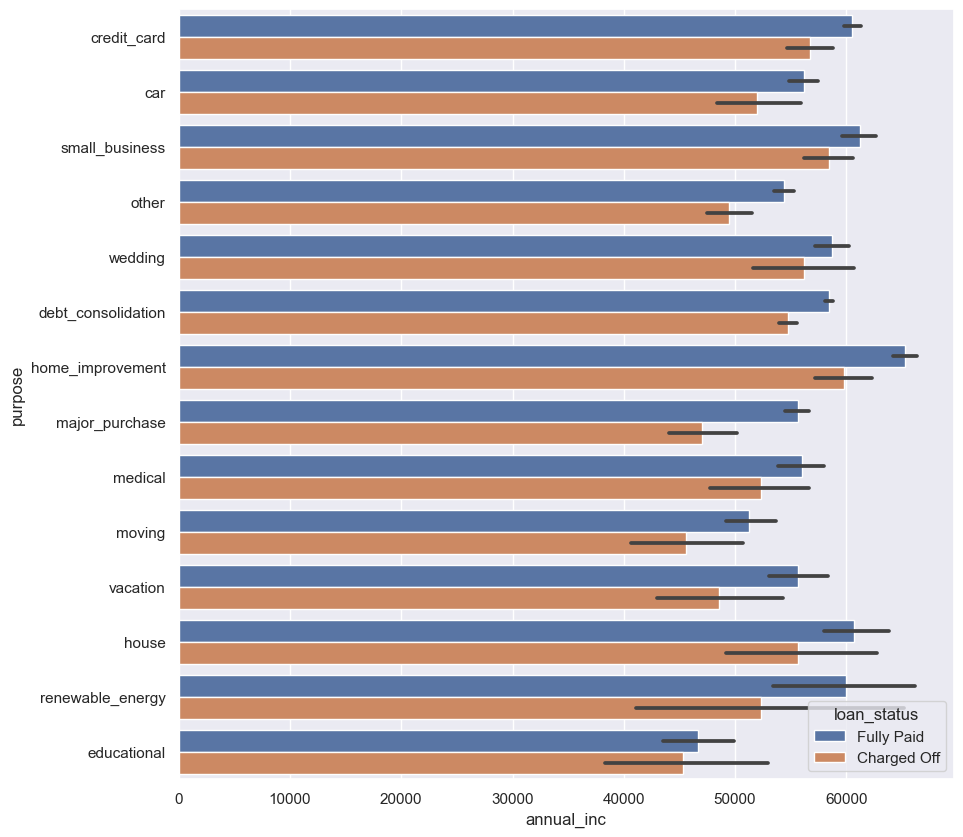

In [101]:
plt.figure(figsize=(10,10))

sns.barplot(data =sal_limit,x='annual_inc', y='purpose', hue ='loan_status',palette="deep")

plt.show()

## Observation - 5

### High salary people where annual income greater than 60k are more likely to opt for home improvement loan and repay it
### Salaried people where annual income less than 60k are more likely to opt for home improvement loan and default it

## 6. Annual Income vs. Grade by Loan Status

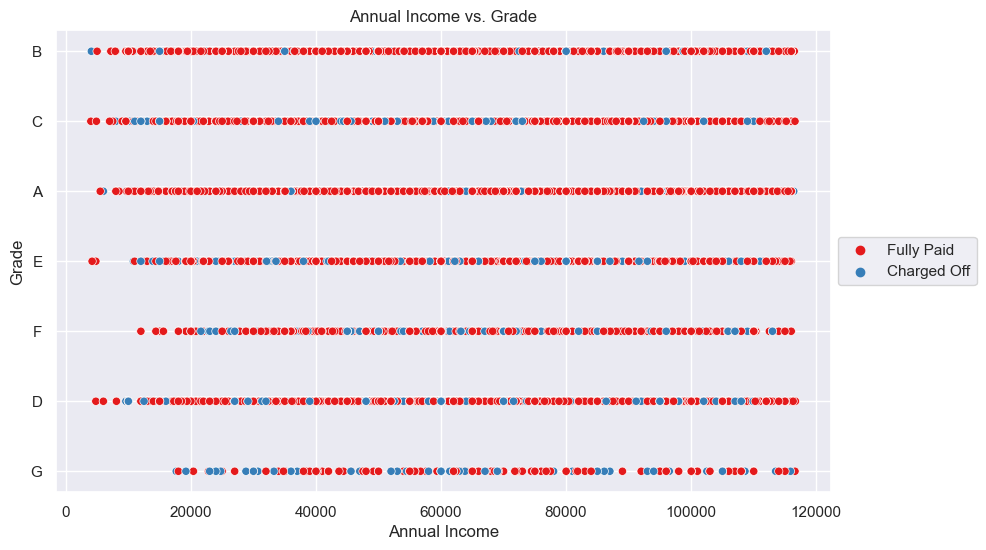

In [102]:
# Using scatter plot to analyse the relation between Annual income and grade

plt.figure(figsize=(10, 6))
ax=sns.scatterplot(x='annual_inc', y='grade', hue='loan_status',data=sal_limit, palette='Set1')

plt.xlabel('Annual Income')
plt.ylabel('Grade')
plt.title('Annual Income vs. Grade')

# Place the legend outside the plot
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

## 7. Loan_status and loan term relation

In [103]:
pd.crosstab(df['term_mod'], df['loan_status'])

loan_status,Charged Off,Fully Paid
term_mod,,
36,3073,25214
60,2326,6931


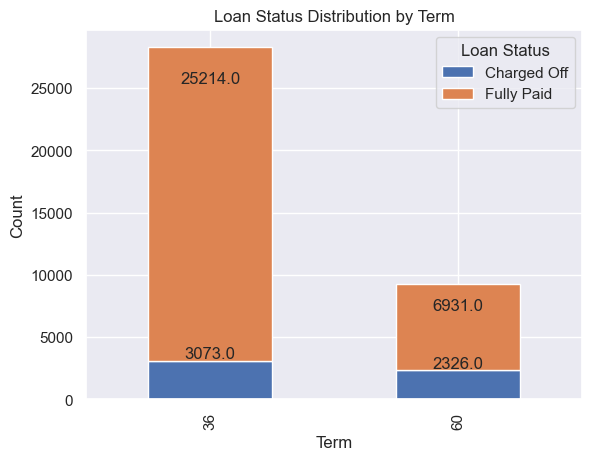

In [104]:
# Create a grouped bar plot
ax = pd.crosstab(df['term_mod'], df['loan_status']).plot(kind='bar', stacked=True)

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Loan Status Distribution by Term')
plt.legend(title='Loan Status')
plt.show()


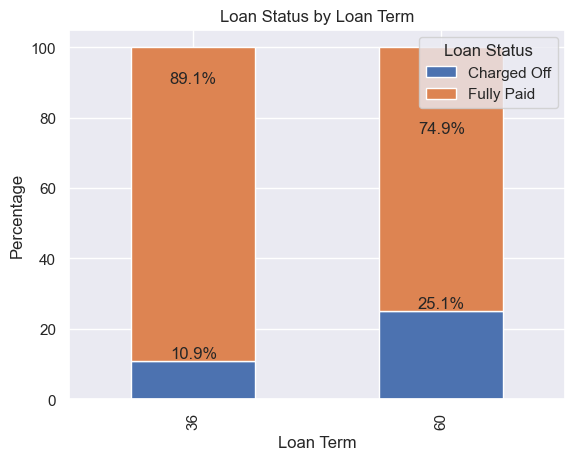

In [105]:

# Count the occurrences of loan statuses for each term
Loan_status_term = pd.crosstab(df['term_mod'], df['loan_status'])

# Convert counts to percentages
Loan_status_term_percentage = Loan_status_term.div(Loan_status_term.sum(axis=1), axis=0) * 100

# Create a grouped bar plot
ax = Loan_status_term_percentage.plot(kind='bar', stacked=True)

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    
plt.xlabel('Loan Term')
plt.ylabel('Percentage')
plt.title('Loan Status by Loan Term')
plt.legend(title='Loan Status')
plt.show()

## Observation - 7:

### Though the number of short term loans taken are 3 times more then that of longterm loans,
### Long term loans are 2 times more likely to be charged off then the shortterm loans

###                    11% of short term loans are charged off
###                    25% of long term loans are charged off

# Summary of observations from Bivariate analysis:

# Multivariate Analysis

In [106]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'pub_rec_bankruptcies',
       'lnamt_to_anlinc', 'issue_year', 'term_mod'],
      dtype='object')

In [107]:
multi_EDA_col_1 = df[['loan_amnt', 'grade', 'term_mod','loan_status','annual_inc']]

In [108]:
multi_EDA_col_1

,loan_amnt,grade,term_mod,loan_status,annual_inc
0,5000,B,36,Fully Paid,24000.0
1,2500,C,60,Charged Off,30000.0
2,2400,C,36,Fully Paid,12252.0
3,10000,C,36,Fully Paid,49200.0
5,5000,A,36,Fully Paid,36000.0
...,...,...,...,...,...
39712,2500,A,36,Fully Paid,110000.0
39713,8500,C,36,Fully Paid,18000.0
39714,5000,A,36,Fully Paid,100000.0
39715,5000,A,36,Fully Paid,200000.0


## Using Loan Amount and loan amount range
## along with loan_status, term_mod, grade

In [109]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Define bins for loan amount ranges
bins = [0, 10000, 25000, 50000,75000,100000, float('inf')]  # Adjust the bin ranges as needed
labels = ['<10k', '10k-25k', '25k-50k', '50k-75k','75k-100k','>100k']

# Create a new column 'loan_amnt_range' with bin labels
multi_EDA_col_1['loan_amnt_range'] = pd.cut(multi_EDA_col_1['loan_amnt'], bins=bins, labels=labels)

# Group by loan status, term_mod, grade, and loan amount range, then show value counts
multi_EDA_1_value_counts_loan = multi_EDA_col_1.groupby(['loan_status', 'term_mod', 'grade', 'loan_amnt_range'])['loan_amnt'].count()
print(multi_EDA_1_value_counts_loan)

# Reset display options to default after printing
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

loan_status  term_mod  grade  loan_amnt_range
Charged Off  36        A      <10k                402
                              10k-25k             117
                              25k-50k               4
                              50k-75k               0
                              75k-100k              0
                              >100k                 0
                       B      <10k                627
                              10k-25k             297
                              25k-50k               9
                              50k-75k               0
                              75k-100k              0
                              >100k                 0
                       C      <10k                550
                              10k-25k             249
                              25k-50k               6
                              50k-75k               0
                              75k-100k              0
                              >100k 

## Using  sal_amnt_range and annual_inc
## along with loan_status, term_mod, grade

In [110]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Define bins for loan amount ranges
bins = [0, 10000, 25000, 50000,75000,100000, float('inf')]  # Adjust the bin ranges as needed
labels = ['<10k', '10k-25k', '25k-50k', '50k-75k','75k-100k','>100k']

# Create a new column 'loan_amnt_range' with bin labels
multi_EDA_col_1['sal_amnt_range'] = pd.cut(multi_EDA_col_1['annual_inc'], bins=bins, labels=labels)

# Group by loan status, term_mod, grade, and loan amount range, then show value counts
multi_EDA_1_value_counts_sal = multi_EDA_col_1.groupby(['loan_status', 'term_mod', 'grade', 'sal_amnt_range'])['annual_inc'].count()
print(multi_EDA_1_value_counts_sal)

# Reset display options to default after printing
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

loan_status  term_mod  grade  sal_amnt_range
Charged Off  36        A      <10k                 5
                              10k-25k             50
                              25k-50k            236
                              50k-75k            142
                              75k-100k            55
                              >100k               35
                       B      <10k                 2
                              10k-25k             93
                              25k-50k            389
                              50k-75k            252
                              75k-100k           114
                              >100k               83
                       C      <10k                 2
                              10k-25k             70
                              25k-50k            347
                              50k-75k            223
                              75k-100k            98
                              >100k               65
 

## Using the above 2 df created - multi_EDA_1_value_counts_loan,   multi_EDA_1_value_counts_sal

### Analyze loan amounts and loan status

In [111]:
# Analyze loan amounts and loan status
print("Loan Amount Analysis:")
print("---------------------")
for status in ['Charged Off', 'Fully Paid']:
    print(f"Loan Status: {status}")
    for term, grade, amount_range in multi_EDA_1_value_counts_loan[status].index:
        count = multi_EDA_1_value_counts_loan[status][(term, grade, amount_range)]
        print(f"Term: {term}, Grade: {grade}, Amount Range: {amount_range}, Count: {count}")
    print("---------------------")

Loan Amount Analysis:
---------------------
Loan Status: Charged Off
Term: 36, Grade: A, Amount Range: <10k, Count: 402
Term: 36, Grade: A, Amount Range: 10k-25k, Count: 117
Term: 36, Grade: A, Amount Range: 25k-50k, Count: 4
Term: 36, Grade: A, Amount Range: 50k-75k, Count: 0
Term: 36, Grade: A, Amount Range: 75k-100k, Count: 0
Term: 36, Grade: A, Amount Range: >100k, Count: 0
Term: 36, Grade: B, Amount Range: <10k, Count: 627
Term: 36, Grade: B, Amount Range: 10k-25k, Count: 297
Term: 36, Grade: B, Amount Range: 25k-50k, Count: 9
Term: 36, Grade: B, Amount Range: 50k-75k, Count: 0
Term: 36, Grade: B, Amount Range: 75k-100k, Count: 0
Term: 36, Grade: B, Amount Range: >100k, Count: 0
Term: 36, Grade: C, Amount Range: <10k, Count: 550
Term: 36, Grade: C, Amount Range: 10k-25k, Count: 249
Term: 36, Grade: C, Amount Range: 25k-50k, Count: 6
Term: 36, Grade: C, Amount Range: 50k-75k, Count: 0
Term: 36, Grade: C, Amount Range: 75k-100k, Count: 0
Term: 36, Grade: C, Amount Range: >100k, Coun

### Analyze annual incomes and loan status

In [112]:
# Analyze annual incomes and loan status
print("Annual Income Analysis:")
print("-----------------------")
for status in ['Charged Off', 'Fully Paid']:
    print(f"Loan Status: {status}")
    for term, grade, sal_range in multi_EDA_1_value_counts_sal[status].index:
        count = multi_EDA_1_value_counts_sal[status][(term, grade, sal_range)]
        print(f"Term: {term}, Grade: {grade}, Income Range: {sal_range}, Count: {count}")
    print("-----------------------")

Annual Income Analysis:
-----------------------
Loan Status: Charged Off
Term: 36, Grade: A, Income Range: <10k, Count: 5
Term: 36, Grade: A, Income Range: 10k-25k, Count: 50
Term: 36, Grade: A, Income Range: 25k-50k, Count: 236
Term: 36, Grade: A, Income Range: 50k-75k, Count: 142
Term: 36, Grade: A, Income Range: 75k-100k, Count: 55
Term: 36, Grade: A, Income Range: >100k, Count: 35
Term: 36, Grade: B, Income Range: <10k, Count: 2
Term: 36, Grade: B, Income Range: 10k-25k, Count: 93
Term: 36, Grade: B, Income Range: 25k-50k, Count: 389
Term: 36, Grade: B, Income Range: 50k-75k, Count: 252
Term: 36, Grade: B, Income Range: 75k-100k, Count: 114
Term: 36, Grade: B, Income Range: >100k, Count: 83
Term: 36, Grade: C, Income Range: <10k, Count: 2
Term: 36, Grade: C, Income Range: 10k-25k, Count: 70
Term: 36, Grade: C, Income Range: 25k-50k, Count: 347
Term: 36, Grade: C, Income Range: 50k-75k, Count: 223
Term: 36, Grade: C, Income Range: 75k-100k, Count: 98
Term: 36, Grade: C, Income Range

## Plotting the multivariate EDA analysis using pair plot

<Figure size 2000x2000 with 0 Axes>

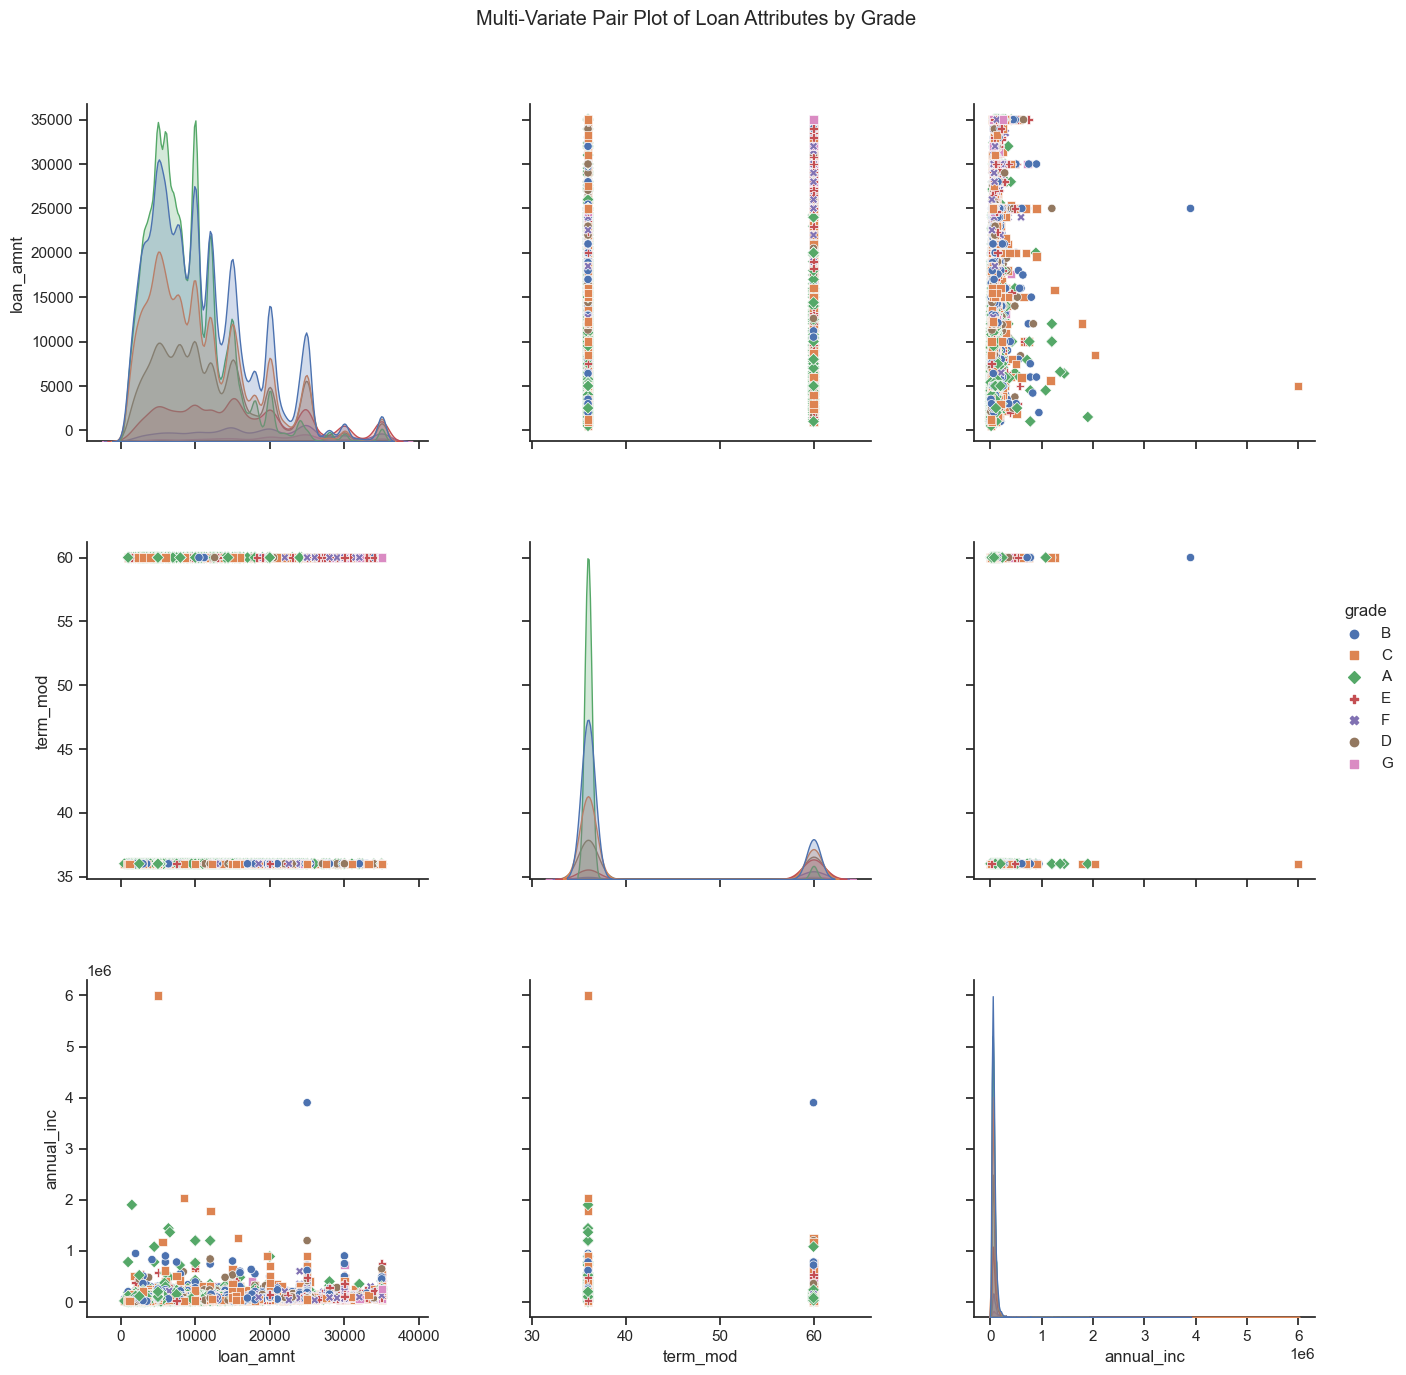

In [113]:

plt.figure(figsize=(20,20))

# Create a pair plot for multi-variate analysis
sns.set(style="ticks")
PP_graph=sns.pairplot(multi_EDA_col_1, hue="grade", markers=["o", "s", "D", "P", "X"], diag_kind="kde", diag_kws={'bw_adjust': 0.5}, height=4.5)

# Improve the spacing between subplots
PP_graph.fig.subplots_adjust(top=0.95, wspace=0.3, hspace=0.3)

plt.suptitle("Multi-Variate Pair Plot of Loan Attributes by Grade", y=1.02)
plt.show()

# Summary:

Based on Summary of observations from Univariate analysis and Bivariate analysis:

#### Univariate Analysis:
These conclusions provide insights into how various attributes and factors in the dataset influence the likelihood of loan default, successful repayment, and the patterns of loan purposes and terms.

#### Bivariate Analysis:
These conclusions provide insights into how various pairs of attributes interact and influence the likelihood of loan default, successful repayment, and the patterns of loan terms, interest rates, grades, annual income, and loan purposes.

#### Univariate Analysis:

1. Loan Status (Observation - 1):
   About 85% of the loans in our dataset have been fully paid, while only 14% have been charged off or defaulted. This indicates that the majority of customers are responsible borrowers who fulfill their loan obligations.

2. Loan Issue Year (Observation - 2):
   The number of loans issued has grown steadily over the years, with a peak in 2011. This suggests that our lending business has been expanding and attracting more customers each year.

3. Grade (Observation - 3):
   Customers with better credit grades (e.g., A and B) are more likely to take loans. This means that higher-grade employees are more confident in their ability to repay loans, making them more attractive prospects for our lending services.

4. Loan Purpose (Observation - 4):
   Debt consolidation is the primary reason for customers taking out loans, followed by other purposes like home improvement and major purchases. This insight helps us tailor our marketing and lending strategies based on the most popular loan purposes.

5. Employee Experience (Observation - 5):
   Both new and experienced employees tend to borrow more frequently. This suggests that our lending services cater to a broad range of employees across different career stages.

6. Loan Amount (Observation - 6):
   We notice that loans with amounts around 5000 are most common, indicating that customers often borrow for medium-sized expenses.

7. Interest Rate (Observation - 7):
   Interest rates tend to cluster around specific values, such as 7.5% and 12%. This information is crucial for our pricing strategy, ensuring that our rates remain competitive.

8. Loan Term and Purpose (Observation - 8):
   Short-term loans are the preferred choice for debt consolidation, while other purposes tend to opt for long-term loans. Aligning loan terms with customer needs can improve repayment rates.

#### Bivariate Analysis:

1. Loan Status and Interest Rate (Observation - 1):
   We find that fully paid loans have a lower mean interest rate compared to charged off loans. Customers who take loans with higher interest rates are more likely to default, suggesting the importance of competitive rates.

2. Loan Status and Salary (Observation - 2):
   Fully paid individuals tend to have higher incomes than charged off individuals. Lower-income borrowers might face challenges in repaying loans, emphasizing the need for tailored loan structures.

3. Loan Status and Grade (Observation - 3):
   Higher-grade employees are more likely to repay loans. This reflects the risk assessment our grading system provides and its role in identifying reliable borrowers.

4. Loan Status and Loan Amount (Observation - 4):
   Smaller loan amounts are associated with higher rates of full repayment. Tailoring loan amounts to a customer's financial capacity can contribute to better repayment rates.

5. Annual Income and Loan Purpose (Observation - 5):
   Higher income customers opt for home improvement loans, which they repay more successfully. Tailoring loan products based on customer income and purpose can enhance default risk management.

6. Loan Term and Loan Status (Observation - 6):
   Long-term loans have a higher rate of charge-offs compared to short-term loans. This indicates the need for careful evaluation of long-term loan applicants and possibly higher scrutiny.

Overall, these analyses help us understand customer behavior, risk factors, and trends in the lending market. 
They enable us to refine our lending strategies, pricing models, and customer targeting, ultimately leading to better risk management, higher customer satisfaction, and improved business growth.

# Conclusion:

1. Risk Assessment and Borrower Profiles:
   - Borrowers with higher annual incomes are generally more creditworthy and have a better repayment capacity.
   - Loan grades play a significant role in predicting loan default. Borrowers with higher-grade loans tend to have better repayment behavior.


2. Loan Amount and Default Behavior:
   - Smaller loan amounts have a higher likelihood of being fully paid, while larger loan amounts are associated with a higher risk of default.


3. Interest Rates and Repayment:
   - Interest rates impact loan repayment behavior. Lower interest rates are correlated with higher rates of full repayment.


4. Loan Purpose and Default Rates:
   - Certain loan purposes, such as small business and renewable energy, have higher default rates. Understanding the relationship between loan purpose and repayment behavior can inform risk assessment strategies.


5. Loan Term Impact:
   - Long-term loans are more likely to result in defaults compared to short-term loans. This suggests that customers may face challenges repaying loans over extended periods.


6. Grade-Based Strategies:
   - A careful assessment of borrower grades is crucial. Lower-grade loans should undergo rigorous evaluation, and risk management strategies should be adapted accordingly.



7. Customer Segmentation:
   - Using attributes like annual income and loan grade, customers can be segmented into risk profiles. This allows for tailored loan offerings and more effective risk assessment.